In [1]:
# helpful packages:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path

# requiredpackages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision import models
from torch import optim
!pip install torchmetrics
from torchmetrics import Accuracy, Precision, F1Score
import torch.utils.data as data

In [2]:
dir_path = Path('../input/concrete-crack-images-for-classification')

In [3]:
# transform data
data_transforms = transforms.Compose([
    #transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
])

In [4]:
# load images to dataset 
datafolder = datasets.ImageFolder(dir_path, transform = data_transforms)
classes = datafolder.classes
print(classes)

['Negative', 'Positive']


label:0
torch.Size([227, 227, 3])


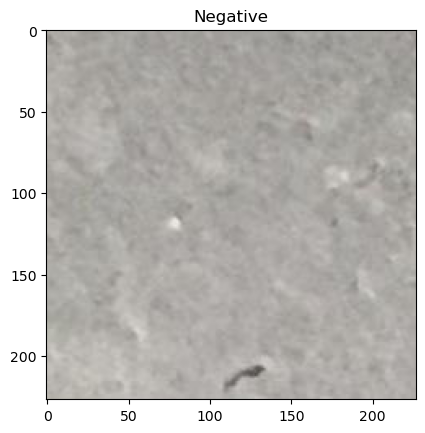

In [5]:
# load a sample
img, label = datafolder[0]
print(f'label:{label}')
img.shape
img_sample = img.permute(2, 1, 0)
print(img_sample.shape)
plt.imshow(img_sample)
plt.title(classes[label]);

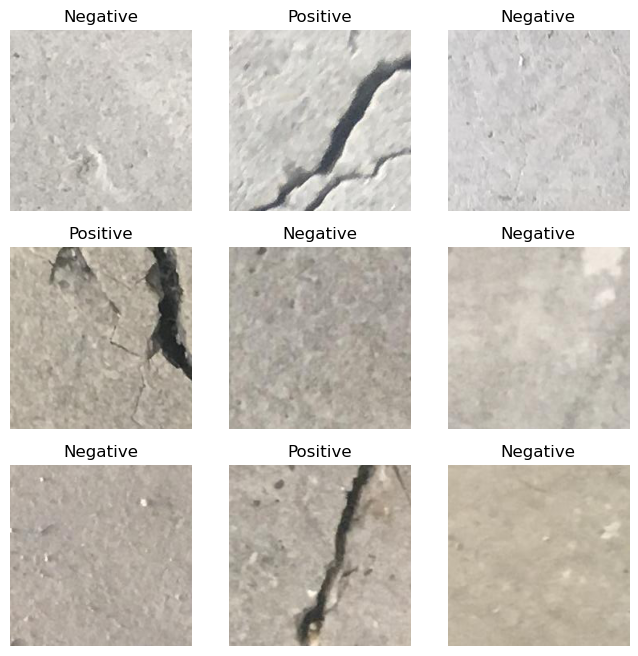

In [6]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(datafolder), size=(1,)).item()
    img, label = datafolder[sample_idx]
    img = img.permute(2, 1, 0)
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [7]:
# transform data
data_transforms_1 = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])

In [8]:
# load images to dataset 1
datafolder1 = datasets.ImageFolder(dir_path, transform = data_transforms_1)

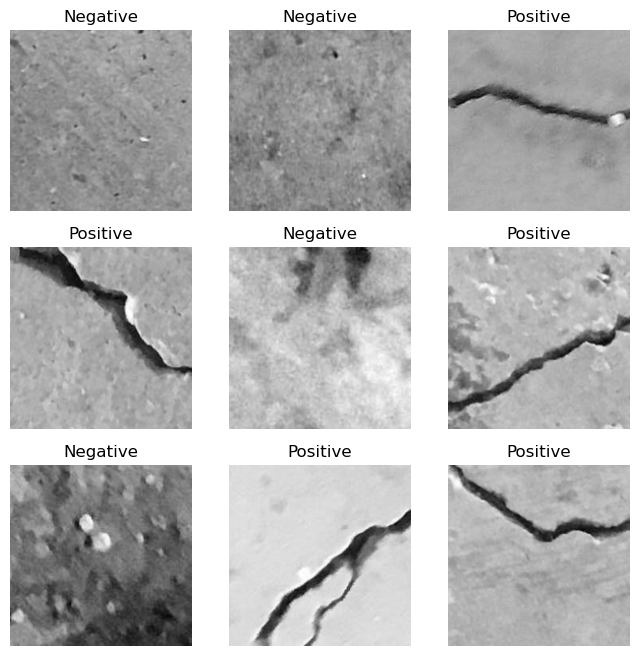

In [10]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(datafolder1), size=(1,)).item()
    img, label = datafolder1[sample_idx]
    img = img.permute(2, 1, 0)
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label])
    plt.axis("off")
    plt.imshow(img,cmap='gray')
plt.show()